<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 25px">
                                                                                                                                                                                                                                                                                                                                                                                                
Text Analysis of The Movie Reviews Corpus                                                                
    
    
    
    
</div>

In this NLP project, I analyze movie review corpora with the objective of accurately classifying positive and negative reviews.                                                                                                                                                                                                                                                       
                                                                                                                                
The **first** part of the notebook explores the dataset to observe different characteristics between positive and negative reviews, such as differences in average length, lexical richness, most frequent words, most frequent adjectives (using POS tagging), and the use of bigrams and trigrams.

In the **second** part of the notebook, I define eight different functions for feature extraction, split each dataset into training and test sets, and observe accuracy, precision, recall, and F1 scores of various machine learning models to assess the best performer in terms of classification/prediction.

To extract features from images, I utilize a combination of the following four image-processing machine learning models:

<ul style="list-style-type: none;">
    <li><span style="color: green; font-size: larger;">🎯</span> Feature 1 - 2000 Most Frequent Words</li>
    <li><span style="color: green; font-size: larger;">🎯</span> Feature 2 - 2000 Most Frequent Bigrams</li>
    <li><span style="color: green; font-size: larger;">🎯</span> Feature 3 - 2000 Most Frequent Trigrams</li>
    <li><span style="color: green; font-size: larger;">🎯</span> Feature 4 - 1000 Moost Frequent Words in Positive Reviews that are not in Negative Reviews, and vice versa</li>
        <li><span style="color: green; font-size: larger;">🎯</span> Feature 5 - Unique Words Contained in the Positive/Negative Lexicon Database 👑</li>
        <li><span style="color: green; font-size: larger;">🎯</span> Feature 6 - Frequency of Emotional Language In Positive and Negative Reviews  </li>
    <li><span style="color: green; font-size: larger;">🎯</span> Feature 7 - Topic Models</li>
    <li><span style="color: green; font-size: larger;">🎯</span> Feature 8 - TF-IDF Vectors
</li>
</ul>

The Machine-Learning models tested for classification are:
<ul style="list-style-type: none;">
    <li><span style="color: green; font-size: larger;">✅</span> Nearest Neighbors (KNN)</li>
    <li><span style="color: green; font-size: larger;">✅</span> Decision Tree</li>
    <li><span style="color: green; font-size: larger;">✅</span> Random Forest</li>
    <li><span style="color: green; font-size: larger;">✅</span> Multi-layer Perceptron Classifier (Neural Network)</li>
    <li><span style="color: green; font-size: larger;">✅</span> AdaBoost: AdaBoostClassifier</li>
    <li><span style="color: green; font-size: larger;">✅</span> SVM Linear</li>
    <li><span style="color: green; font-size: larger;">✅</span> SVM RBF</li>
    <li><span style="color: green; font-size: larger;">✅</span> SVM Sigmoid</li>
    <li><span style="color: green; font-size: larger;">✅</span> SVM Polynomial</li>
    <li><span style="color: green; font-size: larger;">✅</span> Gaussian Naive Bayes</li>
    <li><span style="color: green; font-size: larger;">✅</span> Bernoulli Naive Bayes</li>
    <li><span style="color: green; font-size: larger;">✅</span> Logistic Regression</li>
</ul>


Importing libraries

In [1]:
# Data Manipulation and Analysis Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

Importing Movie Reviews from NLTK Coprora inside a pandas dataframe

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AlessandroSciorilli/nltk_movie_reviews/main/movie_reviews.csv')

<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 25px">
 Data Exploration
</div>

Displaying the first few rows of the dataset

In [3]:
df.head()

,text,sentiment
0,there isn't much good about this movie . \nnot...,neg
1,shakespeare in love is quite possibly the most...,neg
2,bob the happy bastard's quickie review : \ni m...,pos
3,a movie like mortal kombat : annihilation work...,neg
4,"mr . bean , a bumbling security guard from eng...",neg


Checking the shape of the dataset

In [4]:
df.shape

(2000, 2)

Checking for missing data - Luckily, there is no missing data!

In [5]:
df.isna().sum()

text         0
sentiment    0
dtype: int64

Counting the numbers of positive and negative reviews

In [6]:
print(df.sentiment.value_counts())

neg    1000
pos    1000
Name: sentiment, dtype: int64


### Plot 1 - Bar Chart of Positive and Negative Reviews

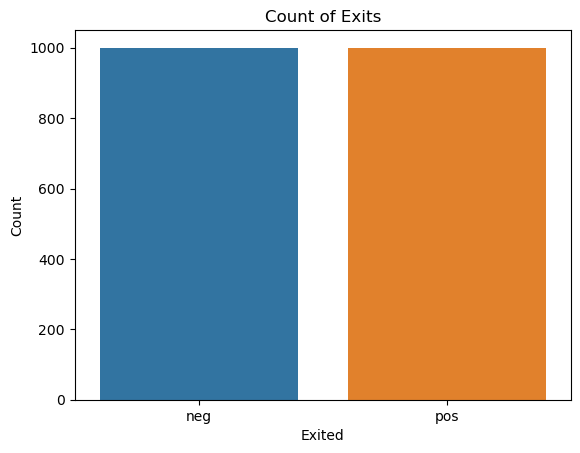

In [7]:
sns.countplot(data=df, x='sentiment')
sns.set_palette("deep")
plt.title('Count of Exits')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

For each review, we tokenize words, remove punctuation, remove stopwords and non-alphabetic words

In [8]:
#Importing libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
# Defining stop words
stopwords = nltk.corpus.stopwords.words('english')

# Defining the function to clean and tokenize text
def clean_tokenize(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords]
    return words
# Applying the function to df text
df['text'] = df['text'].apply(clean_tokenize)

Displaying the first few rows of the new dataset

In [10]:
df.head()

,text,sentiment
0,"[much, good, movie, much, say, acting, directi...",neg
1,"[shakespeare, love, quite, possibly, enjoyable...",neg
2,"[bob, happy, bastard, quickie, review, must, a...",pos
3,"[movie, like, mortal, kombat, annihilation, wo...",neg
4,"[mr, bean, bumbling, security, guard, england,...",neg


#### Visualizing the Length of Positive VS Negative Reviews

In [11]:
# Calculating length of each review
df['length'] = df['text'].apply(len)

# Calculating the average length of reviews for each sentiment
average_lengths = df.groupby('sentiment')['length'].mean()

# Converting the Series to DataFrame for easier plotting
average_lengths = average_lengths.reset_index()

In [12]:
average_lengths

,sentiment,length
0,neg,318.886
1,pos,359.841


### Plot 2 - Horizontal Bar Chart of Average Length of Reviews by Sentiment

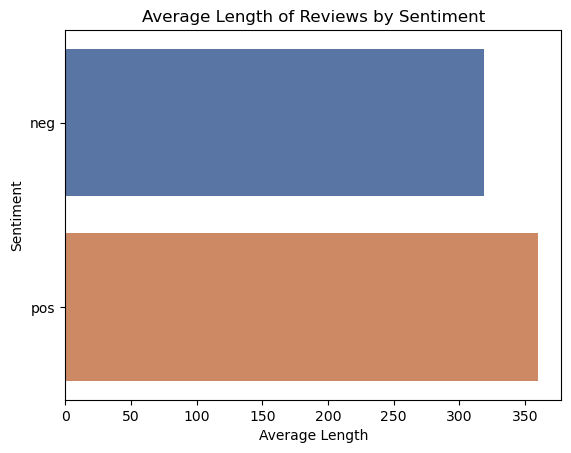

In [13]:
# Plotting the average lengths
sns.barplot(x='length', y='sentiment', data=average_lengths, orient='h')
plt.title('Average Length of Reviews by Sentiment')
plt.xlabel('Average Length')
plt.ylabel('Sentiment')
plt.show()

Positive reviews are, on average, slighly longer!

#### Calculating and plotting Lexical richness.  Lexical richness is the ratio of unique words to the total number of words.

In [14]:
# Defining function to calculate lexical richness
def lexical_richness(text):
    return len(set(text)) / len(text)
# Lexical Richnes Column to the dataframe
df['lexical_richness'] = df['text'].apply(lexical_richness)

# Calculating the average lexical richness for each sentiment
lexical_richness = df.groupby('sentiment')['lexical_richness'].mean()

# Converting the Series to DataFrame for easier plotting
lexical_richness = lexical_richness.reset_index()

In [15]:
lexical_richness

,sentiment,lexical_richness
0,neg,0.784555
1,pos,0.768022


### Plot 3 - Bar Chart of Average Lexical Richness of Reviews by Sentiment

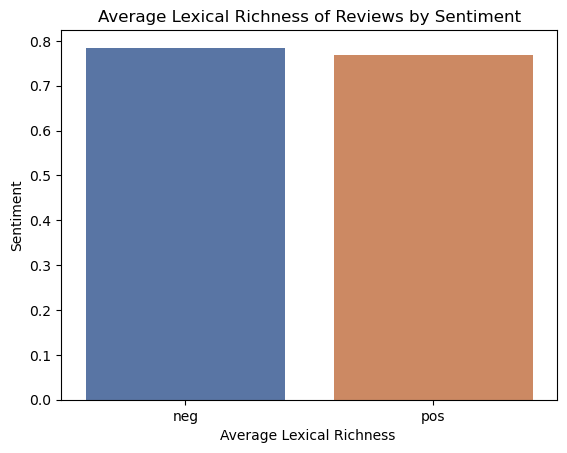

In [16]:
# Plotting the average lexical richness
sns.barplot(x='sentiment', y='lexical_richness', data=lexical_richness)
plt.title('Average Lexical Richness of Reviews by Sentiment')
plt.xlabel('Average Lexical Richness ')
plt.ylabel('Sentiment')
plt.show()

#### Extracting the top 20 most frequent words in positive reviews

In [17]:
# Filtering the DataFrame for positive sentiment
df_pos = df[df['sentiment'] == 'pos']

# Counting word frequencies for positive sentiment
def count_words(df):
    word_counts = {}
    for tokens in df['text']:
        for token in tokens:
            if token in word_counts:
                word_counts[token] += 1
            else:
                word_counts[token] = 1
    return word_counts

word_counts_pos = count_words(df_pos)

# Converting dictionary to DataFrame
df_word_counts_pos = pd.DataFrame(list(word_counts_pos.items()), columns=['Word', 'Count'])

# Finding the top 20 most frequent words
top_words_pos = df_word_counts_pos.nlargest(20, 'Count')

### Plot 4 - Bar Chart of Top 20 Most Frequent Words in Positive Reviews

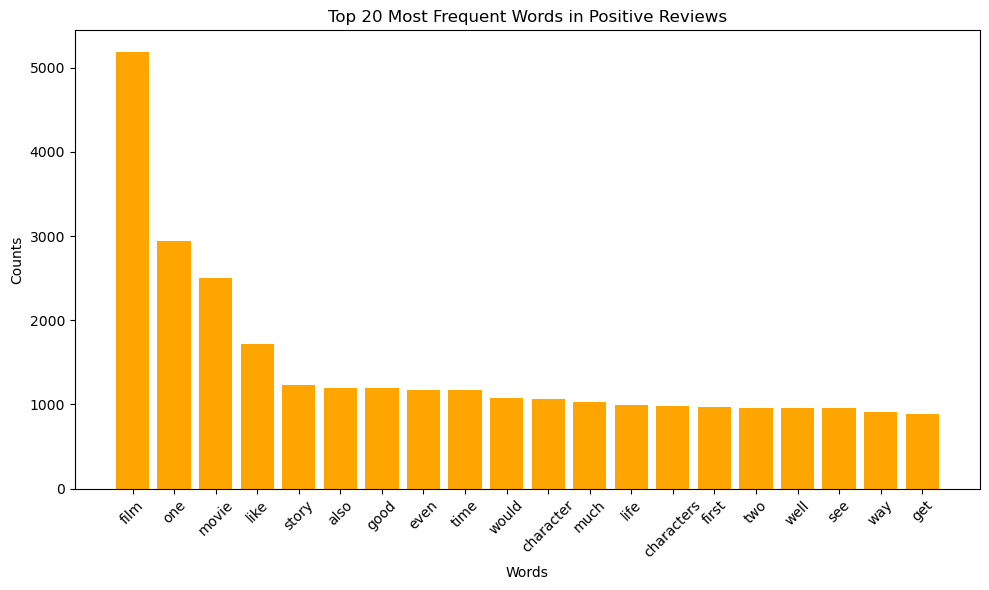

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_words_pos['Word'], top_words_pos['Count'], color='orange')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 20 Most Frequent Words in Positive Reviews')
plt.tight_layout()
plt.show()

#### Extracting the top 20 most frequent words in negative reviews

In [19]:
# Filtering the DataFrame for negative sentiment
df_neg = df[df['sentiment'] == 'neg']

# Counting word frequencies for negative sentiment
def count_words(df):
    word_counts = {}
    for tokens in df['text']:
        for token in tokens:
            if token in word_counts:
                word_counts[token] += 1
            else:
                word_counts[token] = 1
    return word_counts

word_counts_neg = count_words(df_neg)

# Converting dictionary to DataFrame
df_word_counts_neg = pd.DataFrame(list(word_counts_neg.items()), columns=['Word', 'Count'])

# Finding the top 20 most frequent words
top_words_neg = df_word_counts_neg.nlargest(20, 'Count')


### Plot 5 - Bar Chart of Top 20 Most Frequent Words in Positive Reviews

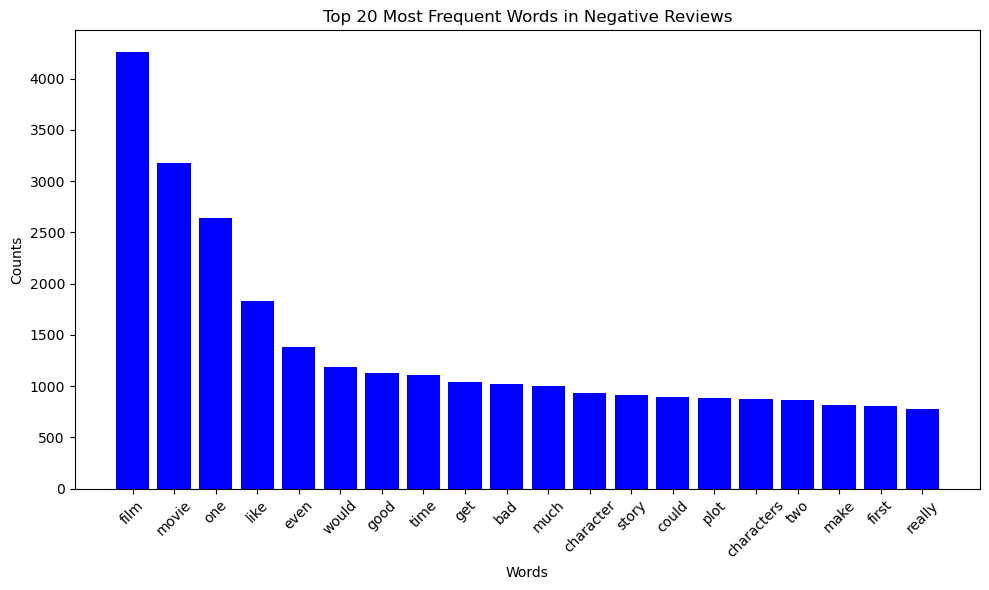

In [20]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_words_neg['Word'], top_words_neg['Count'], color='blue')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 20 Most Frequent Words in Negative Reviews')
plt.tight_layout()
plt.show()

#### Using POS-Tagging, we extract the most frequent adjectives in positive reviews

In [21]:
# Importing library
from nltk import pos_tag

# Function to tag tokens and filter adjectives
def extract_adjectives(tokens):
    tagged = pos_tag(tokens)
    adjectives = [word for word, tag in tagged if tag.startswith('JJ')]
    return adjectives

# Applying the function to extract adjectives
df_pos['adjectives'] = df_pos['text'].apply(extract_adjectives)

# Counting adjectives
adjective_counts = {}
for adjectives in df_pos['adjectives']:
    for adjective in adjectives:
        if adjective in adjective_counts:
            adjective_counts[adjective] += 1
        else:
            adjective_counts[adjective] = 1

# Converting to DataFrame to facilitate sorting
df_adjectives = pd.DataFrame(list(adjective_counts.items()), columns=['Adjective', 'Count'])

# Sorting by frequency and select the top 50
top_adjectives_pos = df_adjectives.nlargest(50, 'Count')

C:\Users\aless\AppData\Local\Temp\ipykernel_31992\1062545853.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['adjectives'] = df_pos['text'].apply(extract_adjectives)


### Plot 6 - Word Cloud of Most Frequent Adjective in Positive Reviews

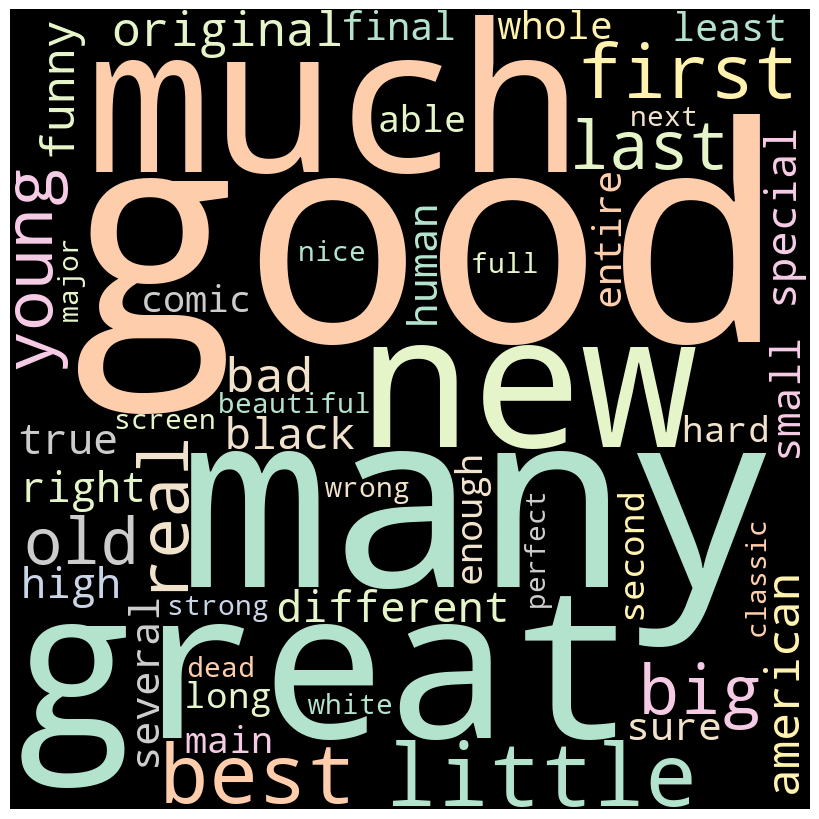

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Creating Adjective Frequency Distribution
adjective_freqs = {row['Adjective']: row['Count'] for index, row in top_adjectives_pos.iterrows()}

# Creating a word cloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      colormap='Pastel2',  
                      max_words=50,  
                      min_font_size=10).generate_from_frequencies(adjective_freqs)

# Displaying the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Using POS-Tagging, we extract the most frequent adjectives in negative reviews

In [23]:
# Function to tag tokens and filter adjectives
def extract_adjectives(tokens):
    tagged = pos_tag(tokens)
    adjectives = [word for word, tag in tagged if tag.startswith('JJ')]
    return adjectives

# Applying the function to extract adjectives
df_neg['adjectives'] = df_neg['text'].apply(extract_adjectives)

# Counting adjectives
adjective_counts = {}
for adjectives in df_neg['adjectives']:
    for adjective in adjectives:
        if adjective in adjective_counts:
            adjective_counts[adjective] += 1
        else:
            adjective_counts[adjective] = 1

# Converting to DataFrame to facilitate sorting
df_adjectives = pd.DataFrame(list(adjective_counts.items()), columns=['Adjective', 'Count'])

# Sorting by frequency and select the top 50
top_adjectives_neg = df_adjectives.nlargest(50, 'Count')

C:\Users\aless\AppData\Local\Temp\ipykernel_31992\3731740370.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['adjectives'] = df_neg['text'].apply(extract_adjectives)


### Plot 7 - Word Cloud of Most Frequent Adjective in Negative Reviews

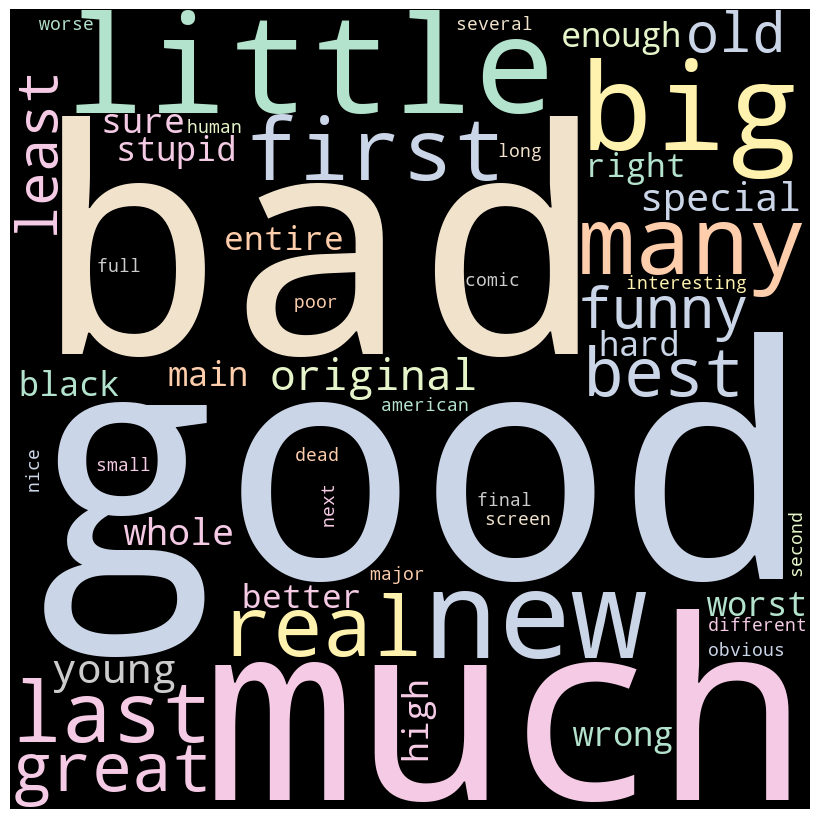

In [24]:
# Creating Adjective Frequency Distribution
adjective_freqs = {row['Adjective']: row['Count'] for index, row in top_adjectives_neg.iterrows()}

# Creating a word cloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      colormap='Pastel2', 
                      max_words=50, 
                      min_font_size=10).generate_from_frequencies(adjective_freqs)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Extracting the most frequent bigrams and trigrams in positive reviews

In [25]:
from nltk import bigrams
from nltk import trigrams
from collections import Counter

In [26]:
# Filtering for positive sentiments
positive_reviews = df[df['sentiment'] == 'pos']['text']

# Creating bigrams from the tokenized words
bigram_list = []
for tokens in positive_reviews:
    bigram_list.extend(list(bigrams(tokens)))

# Counting and printing the most common 20 bigrams
bigram_counts = Counter(bigram_list)
top_20_bigrams_pos = bigram_counts.most_common(20)
print(top_20_bigrams_pos)

[(('special', 'effects'), 171), (('new', 'york'), 131), (('star', 'wars'), 131), (('even', 'though'), 120), (('one', 'best'), 113), (('star', 'trek'), 84), (('science', 'fiction'), 84), (('high', 'school'), 81), (('pulp', 'fiction'), 75), (('takes', 'place'), 72), (('ever', 'seen'), 68), (('supporting', 'cast'), 68), (('one', 'day'), 68), (('first', 'film'), 61), (('one', 'thing'), 61), (('jackie', 'chan'), 61), (('years', 'ago'), 58), (('seems', 'like'), 57), (('much', 'like'), 57), (('films', 'like'), 56)]


In [27]:
# Filtering for positive sentiments
positive_reviews = df[df['sentiment'] == 'pos']['text']

# Creating trigrams from the tokenized words
trigram_list = []
for tokens in positive_reviews:
    trigram_list.extend(list(trigrams(tokens)))

# Counting and printing the most common 20 trigrams
trigram_counts = Counter(trigram_list)
top_20_trigrams_pos = trigram_counts.most_common(20)
print(top_20_trigrams_pos)

[(('saving', 'private', 'ryan'), 39), (('new', 'york', 'city'), 29), (('robert', 'de', 'niro'), 25), (('one', 'best', 'films'), 22), (('tommy', 'lee', 'jones'), 22), (('jay', 'silent', 'bob'), 22), (('thin', 'red', 'line'), 21), (('know', 'last', 'summer'), 20), (('samuel', 'l', 'jackson'), 18), (('babe', 'pig', 'city'), 18), (('world', 'war', 'ii'), 16), (('people', 'vs', 'larry'), 16), (('vs', 'larry', 'flynt'), 16), (('film', 'takes', 'place'), 15), (('blair', 'witch', 'project'), 15), (('american', 'history', 'x'), 14), (('william', 'h', 'macy'), 13), (('star', 'trek', 'insurrection'), 12), (('natural', 'born', 'killers'), 12), (('one', 'best', 'movies'), 12)]


#### Extracting the most frequent bigrams and trigrams in negative reviews

In [28]:
# Filtering for positive sentiments
positive_reviews = df[df['sentiment'] == 'neg']['text']

# Creating bigrams from the tokenized words
bigram_list = []
for tokens in positive_reviews:
    bigram_list.extend(list(bigrams(tokens)))

# Counting and printing the most common 20 bigrams
bigram_counts = Counter(bigram_list)
top_20_bigrams_neg = bigram_counts.most_common(20)
print(top_20_bigrams_neg)

[(('special', 'effects'), 203), (('new', 'york'), 118), (('even', 'though'), 102), (('high', 'school'), 94), (('looks', 'like'), 92), (('bad', 'movie'), 71), (('look', 'like'), 70), (('bad', 'guy'), 70), (('last', 'year'), 66), (('action', 'sequences'), 64), (('running', 'time'), 63), (('much', 'better'), 62), (('van', 'damme'), 61), (('pretty', 'much'), 60), (('first', 'film'), 60), (('one', 'thing'), 58), (('action', 'scenes'), 58), (('bad', 'guys'), 54), (('batman', 'robin'), 53), (('action', 'film'), 53)]


In [29]:
# Filtering for positive sentiments
positive_reviews = df[df['sentiment'] == 'neg']['text']

# Creating trigrams from the tokenized words
trigram_list = []
for tokens in positive_reviews:
    trigram_list.extend(list(trigrams(tokens)))

# Counting and printing the most common 20 trigrams
trigram_counts = Counter(trigram_list)
top_20_trigrams = trigram_counts.most_common(20)
print(top_20_trigrams)

[(('know', 'last', 'summer'), 39), (('wild', 'wild', 'west'), 31), (('new', 'york', 'city'), 24), (('tommy', 'lee', 'jones'), 22), (('freddie', 'prinze', 'jr'), 22), (('blair', 'witch', 'project'), 21), (('jay', 'silent', 'bob'), 17), (('saturday', 'night', 'live'), 17), (('jan', 'de', 'bont'), 16), (('still', 'know', 'last'), 14), (('jennifer', 'love', 'hewitt'), 13), (('house', 'haunted', 'hill'), 13), (('little', 'known', 'facts'), 12), (('brian', 'de', 'palma'), 12), (('samuel', 'l', 'jackson'), 12), (('tarzan', 'lost', 'city'), 12), (('known', 'facts', 'film'), 11), (('facts', 'film', 'stars'), 11), (('runs', 'rated', 'r'), 11), (('rating', 'system', 'wait'), 11)]


<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 25px">
Reviews Classification and Prediction with Machine Learning
</div>

## Feature 1 - 2000 Most Frequent Words

In [30]:
from nltk import FreqDist

In [31]:
# Flattening all tokens into a single list
all_tokens = [token for sublist in df['text'] for token in sublist]

# Counting token frequencies
token_freq = Counter(all_tokens)

# Selecting the 2000 most frequent tokens
most_common_tokens = [token for token, _ in token_freq.most_common(2000)]

# Creating a frequency dataframe for the most common tokens
def get_token_frequencies(tokens, common_tokens):
    token_count = Counter(tokens)
    return [token_count[token] for token in common_tokens]

# Applying the function to each row in df to get token frequencies
features_set1 = df['text'].apply(lambda x: get_token_frequencies(x, most_common_tokens))

# Converting the list of frequencies into a dataframe
features_set1= pd.DataFrame(features_set1.tolist(), columns=most_common_tokens)

# Adding the sentiment column at the end
features_set1['sentiment'] = df['sentiment']

In [32]:
features_set1

,film,movie,one,like,even,good,time,would,story,much,...,murders,wilson,suspenseful,agree,trash,brad,painfully,extra,ocean,sentiment
0,2,7,2,0,1,2,0,3,0,2,...,0,0,0,0,0,0,0,0,0,neg
1,8,0,2,0,4,3,0,1,0,2,...,0,0,0,0,0,0,0,0,0,neg
2,1,4,2,1,0,3,0,0,3,0,...,0,0,0,0,0,0,0,0,0,pos
3,1,27,5,7,4,0,0,1,2,3,...,0,2,0,0,0,0,0,0,0,neg
4,0,18,2,4,1,0,0,2,1,1,...,0,0,0,0,0,0,0,0,0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3,1,5,2,1,0,0,1,2,1,...,0,1,0,0,0,0,0,0,0,neg
1996,0,4,1,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,pos
1997,10,6,4,4,1,3,2,7,0,1,...,0,0,0,0,0,0,0,0,0,neg
1998,1,9,1,1,0,0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,neg


In [33]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
# Defining models

model_list = [
    ('Nearest Neighbors', KNeighborsClassifier(n_neighbors=2)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
    ('Random Forest', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    ('Neural Net', MLPClassifier(alpha=1, max_iter=400)),
    ('AdaBoost', AdaBoostClassifier()),
    ('SVM Linear', SVC(kernel='linear')),
    ('SVM RBF', SVC(kernel='rbf')),
    ('SVM Sigmoid', SVC(kernel='sigmoid')),
    ('SVM Polynomial', SVC(kernel='poly')),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Bernoulli Naive Bayes', BernoulliNB()),
    ('Logistic Regression', LogisticRegression(max_iter=400))
]

In [35]:
# Separating features and labels
X_headers = [col for col in features_set1.columns if col != 'sentiment']
X = features_set1[X_headers].values 
y = features_set1['sentiment'].values

#Splitting the data into training and test in the ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


# Evaluating each model in turn
results = []
for name, model in model_list:
    model.fit(X_train, y_train)  # Training each model
    predictions = model.predict(X_test)  # Testing on the testing dataset
    
    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions, average='binary', pos_label='pos') * 100
    recall = recall_score(y_test, predictions, average='binary', pos_label='pos') * 100
    f1 = f1_score(y_test, predictions, average='binary', pos_label='pos') * 100
    
    results.append((name, accuracy, precision, recall, f1))
    print(f"{name}: Accuracy = {accuracy:.2f}%, Precision = {precision:.2f}%, Recall = {recall:.2f}%, F1 Score = {f1:.2f}%")

Nearest Neighbors: Accuracy = 54.83%, Precision = 60.92%, Recall = 18.28%, F1 Score = 28.12%
Decision Tree: Accuracy = 64.00%, Precision = 60.11%, Recall = 75.86%, F1 Score = 67.07%
Random Forest: Accuracy = 56.00%, Precision = 53.07%, Recall = 77.59%, F1 Score = 63.03%
Neural Net: Accuracy = 81.67%, Precision = 79.61%, Recall = 83.45%, F1 Score = 81.48%
AdaBoost: Accuracy = 76.00%, Precision = 74.17%, Recall = 77.24%, F1 Score = 75.68%
SVM Linear: Accuracy = 80.67%, Precision = 79.00%, Recall = 81.72%, F1 Score = 80.34%
SVM RBF: Accuracy = 81.83%, Precision = 79.29%, Recall = 84.48%, F1 Score = 81.80%
SVM Sigmoid: Accuracy = 73.50%, Precision = 73.99%, Recall = 69.66%, F1 Score = 71.76%
SVM Polynomial: Accuracy = 73.00%, Precision = 92.11%, Recall = 48.28%, F1 Score = 63.35%
Gaussian Naive Bayes: Accuracy = 74.50%, Precision = 78.19%, Recall = 65.52%, F1 Score = 71.29%
Bernoulli Naive Bayes: Accuracy = 82.50%, Precision = 84.64%, Recall = 77.93%, F1 Score = 81.15%
Logistic Regression:

### Plot 8 - Model Accuracy Comparison for Feature 1

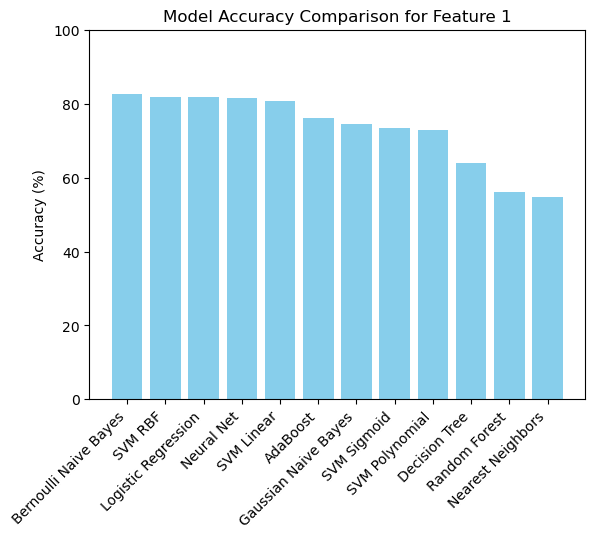

In [36]:
results = [
    ('Nearest Neighbors', 54.83),
    ('Decision Tree', 64.00),
    ('Random Forest', 56.00),
    ('Neural Net', 81.67),
    ('AdaBoost', 76.00),
    ('SVM Linear', 80.67),
    ('SVM RBF', 81.83),
    ('SVM Sigmoid', 73.50),
    ('SVM Polynomial', 73.00),
    ('Gaussian Naive Bayes', 74.50),
    ('Bernoulli Naive Bayes', 82.50),
    ('Logistic Regression', 81.83)
]

# Sorting the results by accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Splitting the sorted results into names and accuracy scores
model_names, accuracies = zip(*sorted_results)

# Plotting
fig, ax = plt.subplots()
ax.bar(model_names, accuracies, color='skyblue')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison for Feature 1')
plt.xticks(rotation=45, ha="right")  
plt.ylim(0, 100) 
plt.show()

### Plot 9 - Confusion Matrix for Bernoulli Naive Bayes - Best Model with Feature 1

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

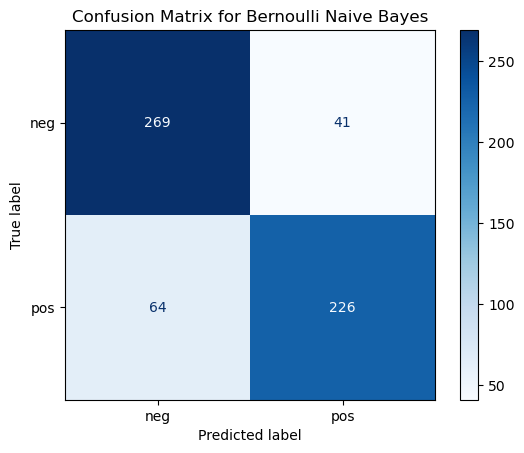

In [38]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
predictions = bernoulli_nb.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=bernoulli_nb.classes_)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bernoulli_nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Bernoulli Naive Bayes')
plt.show()

## Feature 2 - 2000 Most Frequent Bigrams

In [39]:
# Function to generate bigrams from a list of words
def generate_bigrams(words):
    return list(bigrams(words))

# Creating a bigram list for all documents
all_bigrams = []

for text in df['text']:
    all_bigrams.extend(generate_bigrams(text))

# Counting the frequencies of all bigrams
bigram_freq = Counter(all_bigrams)

# Selecting the top 2000 most frequent bigrams
top_bigrams = [bigram for bigram, count in bigram_freq.most_common(2000)]

# Defining a function to count the frequency of each top bigram in a document
def bigram_features(document):
    doc_bigrams = generate_bigrams(document)
    doc_bigram_freq = Counter(doc_bigrams)
    return {bigram: doc_bigram_freq[bigram] if bigram in doc_bigram_freq else 0 for bigram in top_bigrams}

# Applying the function to create features
df['features'] = df['text'].apply(bigram_features)

# Converting the series of dictionaries to a dataframe
features_set2 = pd.DataFrame(list(df['features']))
features_set2['sentiment'] = df['sentiment'] 

In [40]:
features_set2

,"(special, effects)","(new, york)","(even, though)","(high, school)","(star, wars)","(looks, like)","(one, best)","(science, fiction)","(takes, place)","(first, film)",...,"(les, miserables)","(osmosis, jones)","(fear, loathing)","(gets, way)","(galaxy, quest)","(butcher, boy)","(norm, macdonald)","(must, die)","(film, acting)",sentiment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,neg
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pos
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pos
1997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,neg
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg


In [41]:
# Separating features and labels
X_headers = [col for col in features_set2.columns if col != 'sentiment']
X = features_set2[X_headers].values 
y = features_set2['sentiment'].values

#Splitting the data into training and test in the ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


# Evaluating each model in turn
results = []
for name, model in model_list:
    model.fit(X_train, y_train)  # Training each model
    predictions = model.predict(X_test)  # Testing on the testing dataset
    
    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions, average='binary', pos_label='pos') * 100
    recall = recall_score(y_test, predictions, average='binary', pos_label='pos') * 100
    f1 = f1_score(y_test, predictions, average='binary', pos_label='pos') * 100
    
    results.append((name, accuracy, precision, recall, f1))
    print(f"{name}: Accuracy = {accuracy:.2f}%, Precision = {precision:.2f}%, Recall = {recall:.2f}%, F1 Score = {f1:.2f}%")

Nearest Neighbors: Accuracy = 56.83%, Precision = 84.44%, Recall = 13.10%, F1 Score = 22.69%
Decision Tree: Accuracy = 53.67%, Precision = 51.07%, Recall = 98.62%, F1 Score = 67.29%
Random Forest: Accuracy = 55.33%, Precision = 52.16%, Recall = 91.72%, F1 Score = 66.50%
Neural Net: Accuracy = 73.33%, Precision = 70.70%, Recall = 76.55%, F1 Score = 73.51%
AdaBoost: Accuracy = 61.50%, Precision = 57.14%, Recall = 81.38%, F1 Score = 67.14%
SVM Linear: Accuracy = 69.17%, Precision = 66.77%, Recall = 72.07%, F1 Score = 69.32%
SVM RBF: Accuracy = 74.83%, Precision = 73.88%, Recall = 74.14%, F1 Score = 74.01%
SVM Sigmoid: Accuracy = 76.33%, Precision = 73.72%, Recall = 79.31%, F1 Score = 76.41%
SVM Polynomial: Accuracy = 59.83%, Precision = 81.82%, Recall = 21.72%, F1 Score = 34.33%
Gaussian Naive Bayes: Accuracy = 70.00%, Precision = 70.68%, Recall = 64.83%, F1 Score = 67.63%
Bernoulli Naive Bayes: Accuracy = 76.17%, Precision = 73.79%, Recall = 78.62%, F1 Score = 76.13%
Logistic Regression:

### Plot 10 - Model Accuracy Comparison with Feature 2

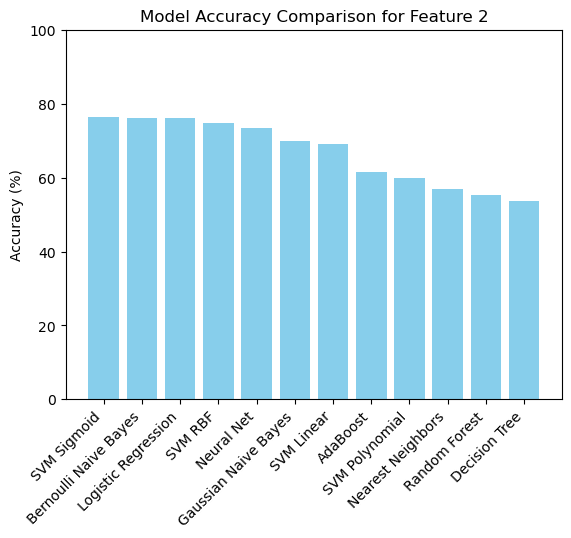

In [42]:
results = [
    ('Nearest Neighbors', 56.83),
    ('Decision Tree', 53.67),
    ('Random Forest', 55.33),
    ('Neural Net', 73.33),
    ('AdaBoost', 61.50),
    ('SVM Linear', 69.17),
    ('SVM RBF', 74.83),
    ('SVM Sigmoid', 76.33),
    ('SVM Polynomial', 59.83),
    ('Gaussian Naive Bayes', 70.00),
    ('Bernoulli Naive Bayes', 76.17),
    ('Logistic Regression', 76.00)
]

# Sorting the results by accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Splitting the sorted results into names and accuracy scores
model_names, accuracies = zip(*sorted_results)

# Plotting
fig, ax = plt.subplots()
ax.bar(model_names, accuracies, color='skyblue')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison for Feature 2')
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.show()

### Plot 11 - Confusion Matrix for SVM Sigmoid - Best Model for Feature 2

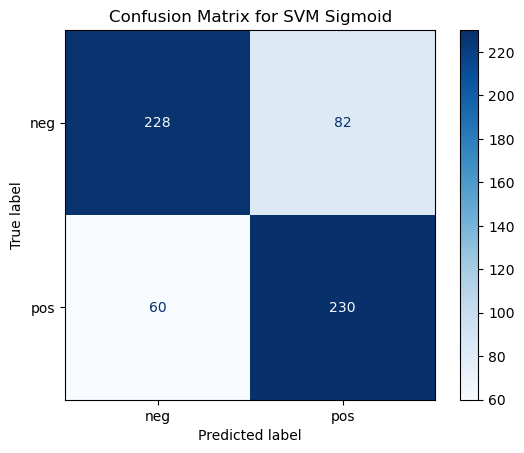

In [43]:
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
predictions = svm_sigmoid.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=svm_sigmoid.classes_)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_sigmoid.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Sigmoid')
plt.show()

# Feature 3 - 2000 Most Frequent Trigrams

In [44]:
# Function to generate trigrams from a list of words
def generate_trigrams(words):
    return list(trigrams(words))

# Creating a trigram list for all documents
all_trigrams = []

for text in df['text']:
    all_trigrams.extend(generate_trigrams(text))

# Counting the frequencies of all trigrams
trigram_freq = Counter(all_trigrams)

# Selecting the top 2000 most frequent trigrams
top_trigrams = [trigram for trigram, count in trigram_freq.most_common(2000)]

# Defining a function to count the frequency of each top trigram in a document
def trigram_features(document):
    doc_trigrams = generate_trigrams(document)
    doc_trigram_freq = Counter(doc_trigrams)
    return {trigram: doc_trigram_freq[trigram] if trigram in doc_trigram_freq else 0 for trigram in top_trigrams}

# Applying the function to create features
df['features'] = df['text'].apply(trigram_features)

# Converting the series of dictionaries to a dataframe
features_set3 = pd.DataFrame(list(df['features']))
features_set3['sentiment'] = df['sentiment']

In [45]:
features_set3

,"(know, last, summer)","(new, york, city)","(tommy, lee, jones)","(saving, private, ryan)","(jay, silent, bob)","(blair, witch, project)","(robert, de, niro)","(wild, wild, west)","(samuel, l, jackson)","(freddie, prinze, jr)",...,"(see, movie, one)","(thomas, anderson, boogie)","(anderson, boogie, nights)","(driving, force, behind)","(subject, matter, film)","(takes, time, explain)","(dead, man, campus)","(ever, seen, moreover)","(difficult, time, trying)",sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pos
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pos
1997,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,neg
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg


In [46]:
# Separating features and labels
X_headers = [col for col in features_set3.columns if col != 'sentiment']
X = features_set3[X_headers].values 
y = features_set3['sentiment'].values

#Splitting the data into training and test in the ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Evaluating each model
results = []
for name, model in model_list:
    model.fit(X_train, y_train)  # Training each model
    predictions = model.predict(X_test)  # Testing on the testing dataset
    
    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions, average='binary', pos_label='pos') * 100
    recall = recall_score(y_test, predictions, average='binary', pos_label='pos') * 100
    f1 = f1_score(y_test, predictions, average='binary', pos_label='pos') * 100
    
    results.append((name, accuracy, precision, recall, f1))
    print(f"{name}: Accuracy = {accuracy:.2f}%, Precision = {precision:.2f}%, Recall = {recall:.2f}%, F1 Score = {f1:.2f}%")

Nearest Neighbors: Accuracy = 55.67%, Precision = 66.22%, Recall = 16.90%, F1 Score = 26.92%
Decision Tree: Accuracy = 48.83%, Precision = 48.57%, Recall = 99.31%, F1 Score = 65.23%
Random Forest: Accuracy = 48.50%, Precision = 48.36%, Recall = 96.90%, F1 Score = 64.52%
Neural Net: Accuracy = 61.17%, Precision = 60.67%, Recall = 55.86%, F1 Score = 58.17%
AdaBoost: Accuracy = 54.17%, Precision = 68.29%, Recall = 9.66%, F1 Score = 16.92%
SVM Linear: Accuracy = 60.67%, Precision = 60.38%, Recall = 54.14%, F1 Score = 57.09%
SVM RBF: Accuracy = 61.17%, Precision = 60.00%, Recall = 58.97%, F1 Score = 59.48%
SVM Sigmoid: Accuracy = 62.33%, Precision = 59.25%, Recall = 70.69%, F1 Score = 64.47%
SVM Polynomial: Accuracy = 47.67%, Precision = 47.86%, Recall = 92.76%, F1 Score = 63.15%
Gaussian Naive Bayes: Accuracy = 64.33%, Precision = 68.10%, Recall = 49.31%, F1 Score = 57.20%
Bernoulli Naive Bayes: Accuracy = 64.83%, Precision = 65.02%, Recall = 58.97%, F1 Score = 61.84%
Logistic Regression: 

### Plot 12 - Model Accuracy Comparison for Feature 3

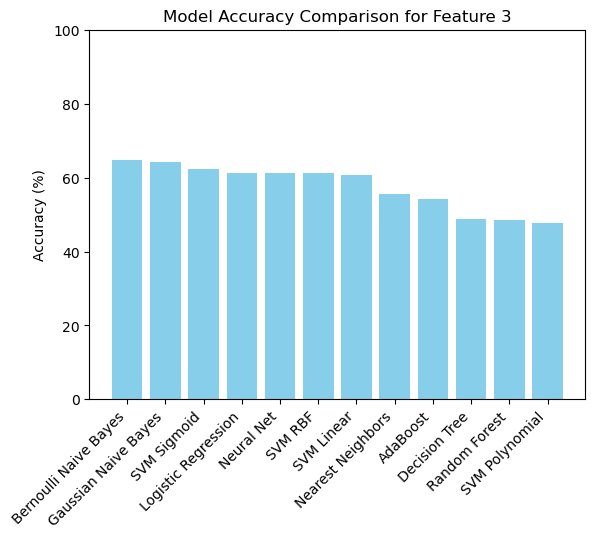

In [47]:
results = [
    ('Nearest Neighbors', 55.67),
    ('Decision Tree', 48.83),
    ('Random Forest', 48.50),
    ('Neural Net', 61.17),
    ('AdaBoost', 54.17),
    ('SVM Linear', 60.67),
    ('SVM RBF', 61.17),
    ('SVM Sigmoid', 62.33),
    ('SVM Polynomial', 47.67),
    ('Gaussian Naive Bayes', 64.33),
    ('Bernoulli Naive Bayes', 64.83),
    ('Logistic Regression', 61.33)
]

# Sorting the results by accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Splitting the sorted results into names and accuracy scores
model_names, accuracies = zip(*sorted_results)

# Plotting
fig, ax = plt.subplots()
ax.bar(model_names, accuracies, color='skyblue')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison for Feature 3')
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.show()

### Plot 13 - Confusion Matrix for Bernoulli Naive Bayes - Best Model with Feature 3

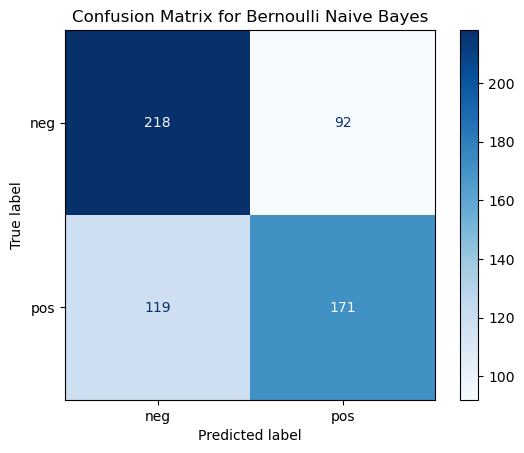

In [48]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
predictions = bernoulli_nb.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=bernoulli_nb.classes_)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bernoulli_nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Bernoulli Naive Bayes')
plt.show()

## Feature 4 - 1000 Moost Frequent Words in Positive Reviews that are not in Negative Reviews, and Vice Versa

In [49]:
# Separating the data by sentiment
pos_texts = df[df['sentiment'] == 'pos']['text']
neg_texts = df[df['sentiment'] == 'neg']['text']

# Flattening the lists and countting frequencies
pos_tokens = Counter([token for sublist in pos_texts for token in sublist])
neg_tokens = Counter([token for sublist in neg_texts for token in sublist])

# Getting the 1000 most common tokens in each category that do not appear in the other
pos_unique = [token for token, count in pos_tokens.items() if token not in neg_tokens]
neg_unique = [token for token, count in neg_tokens.items() if token not in pos_tokens]

pos_top_1000 = [token for token, count in Counter(pos_unique).most_common(1000)]
neg_top_1000 = [token for token, count in Counter(neg_unique).most_common(1000)]

# Combining the tokens and creating a new DataFrame
all_tokens = pos_top_1000 + neg_top_1000

# Initializing the DataFrame with binary indicators
binary_indicators = {token: [] for token in all_tokens}

for text in df['text']:
    text_set = set(text)
    for token in all_tokens:
        binary_indicators[token].append(1 if token in text_set else 0)

features_set4 = pd.DataFrame(binary_indicators)
features_set4['sentiment'] = df['sentiment']

In [50]:
features_set4

,limon,bagger,monetary,swindled,intertwining,antenna,summaries,bowman,expanding,adjustments,...,modified,valiantly,firmest,kayley,jessalyn,gilsig,belated,ruber,excalibur,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
2,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pos
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pos
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg


In [51]:
# Separating features and labels
X_headers = [col for col in features_set4.columns if col != 'sentiment']
X = features_set4[X_headers].values 
y = features_set4['sentiment'].values

#Splitting the data into training and test in the ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Evaluating each model
results = []
for name, model in model_list:
    model.fit(X_train, y_train)  # Training each model
    predictions = model.predict(X_test)  # Testing on the testing dataset
    
    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions, average='binary', pos_label='pos') * 100
    recall = recall_score(y_test, predictions, average='binary', pos_label='pos') * 100
    f1 = f1_score(y_test, predictions, average='binary', pos_label='pos') * 100
    
    results.append((name, accuracy, precision, recall, f1))
    print(f"{name}: Accuracy = {accuracy:.2f}%, Precision = {precision:.2f}%, Recall = {recall:.2f}%, F1 Score = {f1:.2f}%")

Nearest Neighbors: Accuracy = 60.00%, Precision = 100.00%, Recall = 17.24%, F1 Score = 29.41%
Decision Tree: Accuracy = 48.67%, Precision = 48.49%, Recall = 100.00%, F1 Score = 65.32%
Random Forest: Accuracy = 50.50%, Precision = 49.40%, Recall = 100.00%, F1 Score = 66.13%
Neural Net: Accuracy = 73.67%, Precision = 64.73%, Recall = 100.00%, F1 Score = 78.59%
AdaBoost: Accuracy = 58.33%, Precision = 100.00%, Recall = 13.79%, F1 Score = 24.24%
SVM Linear: Accuracy = 67.00%, Precision = 59.43%, Recall = 100.00%, F1 Score = 74.55%
SVM RBF: Accuracy = 67.17%, Precision = 60.50%, Recall = 92.41%, F1 Score = 73.12%
SVM Sigmoid: Accuracy = 69.50%, Precision = 61.31%, Recall = 100.00%, F1 Score = 76.02%
SVM Polynomial: Accuracy = 67.83%, Precision = 60.04%, Recall = 100.00%, F1 Score = 75.03%
Gaussian Naive Bayes: Accuracy = 76.17%, Precision = 100.00%, Recall = 50.69%, F1 Score = 67.28%
Bernoulli Naive Bayes: Accuracy = 74.50%, Precision = 65.60%, Recall = 99.31%, F1 Score = 79.01%
Logistic Re

### Plot 14 - Model Accuracy Comparison for Feature 4

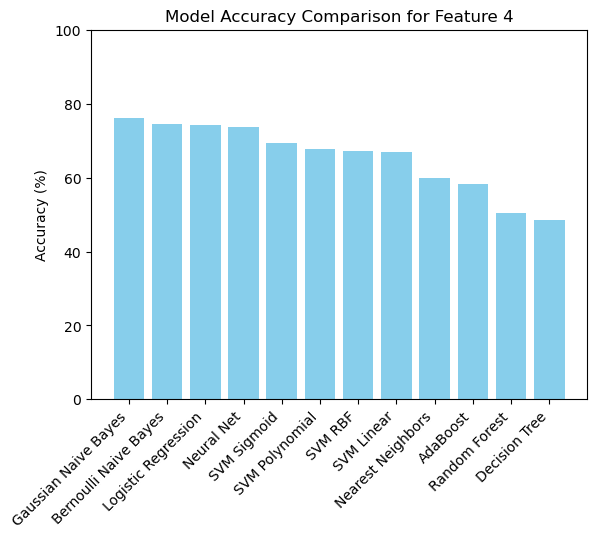

In [52]:
results = [
    ('Nearest Neighbors', 60.00),
    ('Decision Tree', 48.67),
    ('Random Forest', 50.50),
    ('Neural Net', 73.67),
    ('AdaBoost', 58.33),
    ('SVM Linear', 67.00),
    ('SVM RBF', 67.17),
    ('SVM Sigmoid', 69.50),
    ('SVM Polynomial', 67.83),
    ('Gaussian Naive Bayes', 76.17),
    ('Bernoulli Naive Bayes', 74.50),
    ('Logistic Regression', 74.17)
]

# Sorting the results by accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Splitting the sorted results into names and accuracy scores
model_names, accuracies = zip(*sorted_results)

# Plotting
fig, ax = plt.subplots()
ax.bar(model_names, accuracies, color='skyblue')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison for Feature 4')
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.show()

### Plot 15 - Confusion Matrix for Gaussian Naive Bayes - Best Model with Feature 4

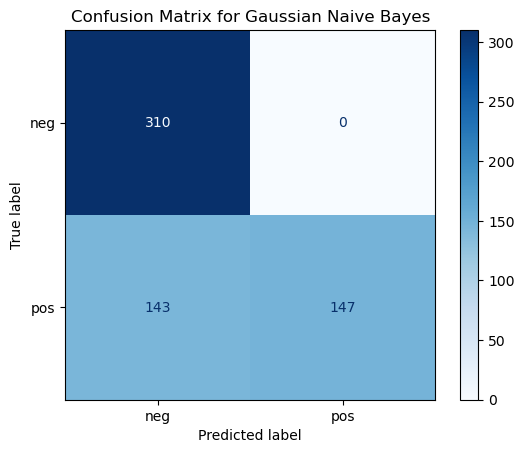

In [53]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
predictions = gaussian_nb.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=gaussian_nb.classes_)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian_nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

## Feature 5 - Unique Words Contained in the Positive/Negative Lexicon Database

In [54]:
# Importing Necessary Libraries
from nltk.corpus import opinion_lexicon
from collections import Counter

In [55]:
# Downloading and loading the positive and negative lexicons
nltk.download('opinion_lexicon')
positive_lexicon = set(opinion_lexicon.positive())
negative_lexicon = set(opinion_lexicon.negative())

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\aless\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [56]:
from collections import Counter

In [57]:
pos_words = []
neg_words = []

# Aggregating words by sentiment
for index, row in df.iterrows():
    if row['sentiment'] == 'pos':
        # Filtering words by positive lexicon before adding
        filtered_pos = [word for word in row['text'] if word in positive_lexicon]
        pos_words.extend(filtered_pos)
    else:
        # Filtering words by negative lexicon before adding
        filtered_neg = [word for word in row['text'] if word in negative_lexicon]
        neg_words.extend(filtered_neg)

# Counting the frequencies of words in each sentiment
pos_freq = Counter(pos_words)
neg_freq = Counter(neg_words)

# Selecting the top 1000 words from each sentiment
top_pos = {word for word, count in pos_freq.most_common(1000)}
top_neg = {word for word, count in neg_freq.most_common(1000)}

# Defining a function to create binary features for each document
def binary_features(document, sentiment):
    relevant_words = top_pos if sentiment == 'pos' else top_neg
    return {word: 1 if word in document else 0 for word in relevant_words}

# Applying the function to create features
df['features'] = df.apply(lambda row: binary_features(row['text'], row['sentiment']), axis=1)

# Converting the series of dictionaries to a dataframe
features_set5 = pd.DataFrame(list(df['features'])).fillna(0).astype(int)
features_set5['sentiment'] = df['sentiment']


In [58]:
features_set5

,deny,knife,haunting,boring,perverse,raped,ruin,inability,flimsy,bumpy,...,worthwhile,chaste,improved,supremacy,amazement,winner,progress,regard,enjoyed,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pos
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,pos
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg


In [59]:
# Separating features and labels
X_headers = [col for col in features_set5.columns if col != 'sentiment']
X = features_set5[X_headers].values 
y = features_set5['sentiment'].values

#Splitting the data into training and test in the ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Evaluating each model
results = []
for name, model in model_list:
    model.fit(X_train, y_train)  # Train each model
    predictions = model.predict(X_test)  # Test on the testing dataset
    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions, average='binary', pos_label='pos') * 100
    recall = recall_score(y_test, predictions, average='binary', pos_label='pos') * 100
    f1 = f1_score(y_test, predictions, average='binary', pos_label='pos') * 100
    results.append((name, accuracy, precision, recall, f1))
    print(f"{name}: Accuracy = {accuracy:.2f}%, Precision = {precision:.2f}%, Recall = {recall:.2f}%, F1 Score = {f1:.2f}%")

Nearest Neighbors: Accuracy = 91.67%, Precision = 100.00%, Recall = 82.76%, F1 Score = 90.57%
Decision Tree: Accuracy = 98.67%, Precision = 100.00%, Recall = 97.24%, F1 Score = 98.60%
Random Forest: Accuracy = 62.67%, Precision = 56.42%, Recall = 100.00%, F1 Score = 72.14%
Neural Net: Accuracy = 99.83%, Precision = 100.00%, Recall = 99.66%, F1 Score = 99.83%
AdaBoost: Accuracy = 99.50%, Precision = 100.00%, Recall = 98.97%, F1 Score = 99.48%
SVM Linear: Accuracy = 99.83%, Precision = 100.00%, Recall = 99.66%, F1 Score = 99.83%
SVM RBF: Accuracy = 99.83%, Precision = 100.00%, Recall = 99.66%, F1 Score = 99.83%
SVM Sigmoid: Accuracy = 99.83%, Precision = 100.00%, Recall = 99.66%, F1 Score = 99.83%
SVM Polynomial: Accuracy = 89.33%, Precision = 100.00%, Recall = 77.93%, F1 Score = 87.60%
Gaussian Naive Bayes: Accuracy = 100.00%, Precision = 100.00%, Recall = 100.00%, F1 Score = 100.00%
Bernoulli Naive Bayes: Accuracy = 100.00%, Precision = 100.00%, Recall = 100.00%, F1 Score = 100.00%
Log

<div style="background-color: yellow; padding: 10px; font-weight: bold; font-size: 18px">
Best Performing Feature!
</div>

### Plot 16 - Model Accuracy Comparison for Feature 5

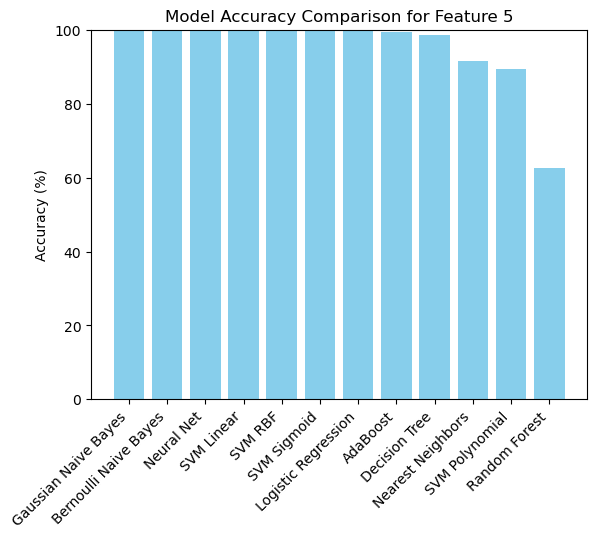

In [60]:
results = [
    ('Nearest Neighbors', 91.67),
    ('Decision Tree', 98.67),
    ('Random Forest', 62.67),
    ('Neural Net', 99.83),
    ('AdaBoost', 99.50),
    ('SVM Linear', 99.83),
    ('SVM RBF', 99.83),
    ('SVM Sigmoid', 99.83),
    ('SVM Polynomial', 89.33),
    ('Gaussian Naive Bayes', 100.00),
    ('Bernoulli Naive Bayes', 100.00),
    ('Logistic Regression', 99.83)
]

# Sorting the results by accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Splitting the sorted results into names and accuracy scores
model_names, accuracies = zip(*sorted_results)

# Plotting
fig, ax = plt.subplots()
ax.bar(model_names, accuracies, color='skyblue')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison for Feature 5')
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.show()

### Plot 17 - Confusion Matrix for Gaussian Naive Bayes - Best Model with Feature 5

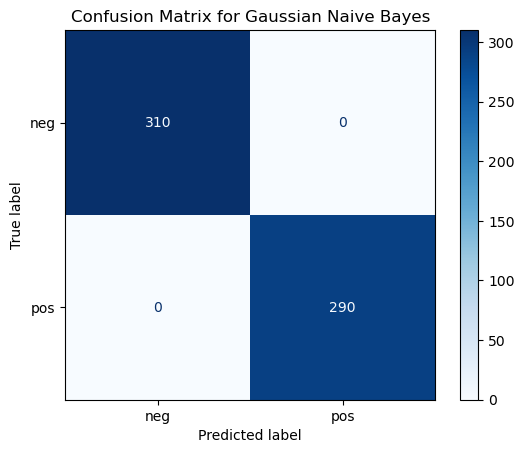

In [61]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
predictions = gaussian_nb.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=gaussian_nb.classes_)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gaussian_nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

## Feature 6 - Frequency of Emotional Language In Positive and Negative Reviews

In [62]:
pip install nrclex

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
from nrclex import NRCLex

In [64]:
# Function to process each review in the DataFrame
def process_reviews(df):
    results = []
    for index, row in df.iterrows():
        review_text = ' '.join(row['text'])
        emotion_text = NRCLex(review_text)
        emotions = emotion_text.affect_frequencies
        results.append({
            'emotions': emotions,
            'sentiment': row['sentiment']
        })
    return results

# Applying the function to the DataFrame
emotion_data = process_reviews(df)

# Function to extract features for each emotion dictionary
def emotion_features_extractor(emotion_data):
    features = {}
    for emotion, frequency in emotion_data['emotions'].items():
        features[f"emotion({emotion})"] = frequency
    return features

# Extracting features for each review
features_list = [emotion_features_extractor(item) for item in emotion_data]
features_set6 = pd.DataFrame(features_list)
features_set6['sentiment'] = [item['sentiment'] for item in emotion_data] 
features_set6.dropna(inplace=True)

In [65]:
features_set6

,emotion(fear),emotion(anger),emotion(anticip),emotion(trust),emotion(surprise),emotion(positive),emotion(negative),emotion(sadness),emotion(disgust),emotion(joy),emotion(anticipation),sentiment
0,0.084211,0.073684,0.0,0.115789,0.052632,0.189474,0.168421,0.094737,0.084211,0.063158,0.073684,neg
1,0.035294,0.035294,0.0,0.135294,0.064706,0.294118,0.105882,0.023529,0.017647,0.158824,0.129412,neg
2,0.050505,0.050505,0.0,0.151515,0.060606,0.212121,0.080808,0.050505,0.060606,0.131313,0.151515,pos
3,0.120603,0.090452,0.0,0.115578,0.030151,0.165829,0.180905,0.075377,0.025126,0.100503,0.095477,neg
4,0.048193,0.060241,0.0,0.168675,0.036145,0.253012,0.120482,0.036145,0.024096,0.144578,0.108434,neg
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.091429,0.051429,0.0,0.160000,0.034286,0.257143,0.108571,0.045714,0.051429,0.114286,0.085714,neg
1996,0.093750,0.046875,0.0,0.093750,0.078125,0.140625,0.140625,0.062500,0.062500,0.125000,0.156250,pos
1997,0.086634,0.096535,0.0,0.086634,0.066832,0.163366,0.188119,0.074257,0.086634,0.069307,0.081683,neg
1998,0.076923,0.064103,0.0,0.166667,0.038462,0.217949,0.141026,0.102564,0.051282,0.051282,0.089744,neg


In [66]:
# Separating features and labels
X_headers = [col for col in features_set6.columns if col != 'sentiment']
X = features_set6[X_headers].values 
y = features_set6['sentiment'].values

#Splitting the data into training and test in the ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Evaluating each model
results = []
for name, model in model_list:
    model.fit(X_train, y_train)  # Training each model
    predictions = model.predict(X_test)  # Testing on the testing dataset
    
    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions, average='binary', pos_label='pos') * 100
    recall = recall_score(y_test, predictions, average='binary', pos_label='pos') * 100
    f1 = f1_score(y_test, predictions, average='binary', pos_label='pos') * 100
    
    results.append((name, accuracy, precision, recall, f1))
    print(f"{name}: Accuracy = {accuracy:.2f}%, Precision = {precision:.2f}%, Recall = {recall:.2f}%, F1 Score = {f1:.2f}%")

Nearest Neighbors: Accuracy = 58.00%, Precision = 64.02%, Recall = 35.23%, F1 Score = 45.45%
Decision Tree: Accuracy = 62.00%, Precision = 63.67%, Recall = 54.70%, F1 Score = 58.84%
Random Forest: Accuracy = 63.83%, Precision = 64.62%, Recall = 60.07%, F1 Score = 62.26%
Neural Net: Accuracy = 61.33%, Precision = 60.86%, Recall = 62.08%, F1 Score = 61.46%
AdaBoost: Accuracy = 62.00%, Precision = 61.74%, Recall = 61.74%, F1 Score = 61.74%
SVM Linear: Accuracy = 61.50%, Precision = 61.51%, Recall = 60.07%, F1 Score = 60.78%
SVM RBF: Accuracy = 63.00%, Precision = 63.77%, Recall = 59.06%, F1 Score = 61.32%
SVM Sigmoid: Accuracy = 57.67%, Precision = 54.51%, Recall = 89.26%, F1 Score = 67.68%
SVM Polynomial: Accuracy = 62.83%, Precision = 63.25%, Recall = 60.07%, F1 Score = 61.62%
Gaussian Naive Bayes: Accuracy = 61.00%, Precision = 61.03%, Recall = 59.40%, F1 Score = 60.20%
Bernoulli Naive Bayes: Accuracy = 50.67%, Precision = 62.50%, Recall = 1.68%, F1 Score = 3.27%
Logistic Regression: A

### Plot 18 - Model Accuracy Comparison for Feature 6

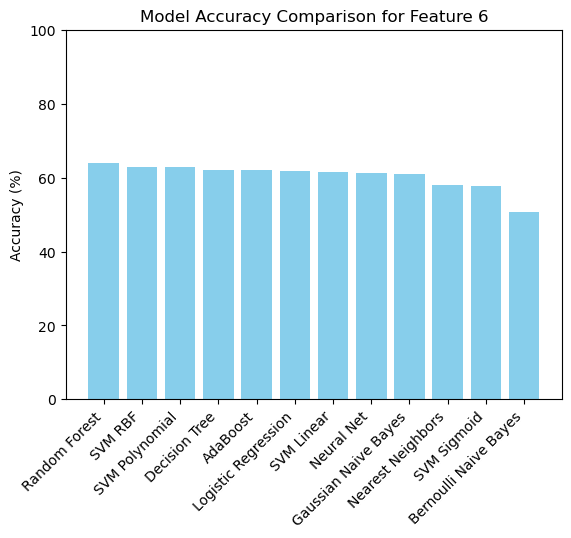

In [67]:
results = [
    ('Nearest Neighbors', 58.00),
    ('Decision Tree', 62.00),
    ('Random Forest', 63.83),
    ('Neural Net', 61.33),
    ('AdaBoost', 62.00),
    ('SVM Linear', 61.50),
    ('SVM RBF', 63.00),
    ('SVM Sigmoid', 57.67),
    ('SVM Polynomial', 62.83),
    ('Gaussian Naive Bayes', 61.00),
    ('Bernoulli Naive Bayes', 50.67),
    ('Logistic Regression', 61.67)
]

# Sorting the results by accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Splitting the sorted results into names and accuracy scores
model_names, accuracies = zip(*sorted_results)

# Plotting
fig, ax = plt.subplots()
ax.bar(model_names, accuracies, color='skyblue')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison for Feature 6')
plt.xticks(rotation=45, ha="right")  
plt.ylim(0, 100)
plt.show()

### Plot 19 - Confusion Matrix for Random Forest - Best Model with Feature 6

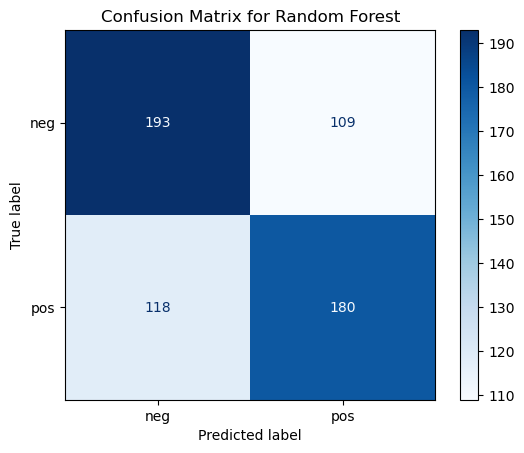

In [68]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
predictions_rf = random_forest.predict(X_test)

# Calculating the confusion matrix
cm_rf = confusion_matrix(y_test, predictions_rf)

# Displaying the confusion matrix
disp= ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()

## Feature 7 - Topic Models

In [69]:
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel

In [70]:
# Creating a dictionary representation of the documents
dictionary = corpora.Dictionary(df['text'])

# Filtering out extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

**no_below=15** filters out tokens that appear in fewer than 15 documents. It helps us to remove very rare words that are not informative.

**no_above=0.5** filters out tokens that appear in more than 50% of the documents. It helps us to remove very common words that are not informative.

**keep_n=100000** keeps only the top 100,000 most frequent tokens after the filtering. It's our way to limit the dictionary size.

In [71]:
# Converting the dictionary to a Bag of Words corpus for reference
corpus = [dictionary.doc2bow(text) for text in df['text']]

# LDA model parameters
num_topics = 10
passes = 20
lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes, random_state=42)

We set an arbitrary number of topics equal to 10. For best effectiveness, hyperparameter tuning can be implemented to define the best number of topics for this dataset. We won't execute hyperparameter tuning in our analysis, leaving it to future explorations.

In [72]:
# Using the LDA model to get topics for each document
def get_document_topics(bow):
    return [prob for topic, prob in lda.get_document_topics(bow, minimum_probability=0)]

# Applying the function to convert documents to topic distributions
df['topics'] = [get_document_topics(bow) for bow in corpus]

# Converting the list of topic distributions to a DataFrame
features_set7 = pd.DataFrame(df['topics'].tolist())

# Adding the sentiment column from the original DataFrame
features_set7['sentiment'] = df['sentiment']

In [73]:
features_set7

,0,1,2,3,4,5,6,7,8,9,sentiment
0,0.000820,0.000820,0.000820,0.000820,0.000820,0.000820,0.633367,0.360071,0.000820,0.000820,neg
1,0.024763,0.230144,0.000329,0.458470,0.000329,0.024640,0.000329,0.000329,0.043797,0.216869,neg
2,0.000695,0.222810,0.000695,0.000695,0.771630,0.000695,0.000695,0.000695,0.000695,0.000695,pos
3,0.000331,0.204153,0.000331,0.000331,0.000331,0.000331,0.677704,0.000331,0.098165,0.017989,neg
4,0.000474,0.494104,0.000474,0.000474,0.000474,0.129425,0.120745,0.000474,0.252880,0.000474,neg
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000382,0.000382,0.000382,0.000382,0.487158,0.198594,0.000382,0.000382,0.311573,0.000382,neg
1996,0.001205,0.001206,0.001205,0.001206,0.001206,0.475947,0.514409,0.001205,0.001206,0.001205,pos
1997,0.000210,0.000210,0.000210,0.000210,0.542691,0.000210,0.193166,0.096445,0.166437,0.000210,neg
1998,0.000700,0.211829,0.000700,0.000700,0.000700,0.000700,0.782572,0.000700,0.000700,0.000700,neg


In [74]:
# Separating features and labels
X_headers = [col for col in features_set7.columns if col != 'sentiment']
X = features_set7[X_headers].values 
y = features_set7['sentiment'].values

#Splitting the data into training and test in the ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Evaluating each model
results = []
for name, model in model_list:
    model.fit(X_train, y_train)  # Training each model
    predictions = model.predict(X_test)  # Testing on the testing dataset
    accuracy = accuracy_score(y_test, predictions) * 100
    
    precision = precision_score(y_test, predictions, average='binary', pos_label='pos') * 100
    recall = recall_score(y_test, predictions, average='binary', pos_label='pos') * 100
    f1 = f1_score(y_test, predictions, average='binary', pos_label='pos') * 100
    results.append((name, accuracy, precision, recall, f1))
    print(f"{name}: Accuracy = {accuracy:.2f}%, Precision = {precision:.2f}%, Recall = {recall:.2f}%, F1 Score = {f1:.2f}%")

Nearest Neighbors: Accuracy = 59.83%, Precision = 64.85%, Recall = 36.90%, F1 Score = 47.03%
Decision Tree: Accuracy = 62.17%, Precision = 60.54%, Recall = 62.41%, F1 Score = 61.46%
Random Forest: Accuracy = 66.83%, Precision = 67.84%, Recall = 59.66%, F1 Score = 63.49%
Neural Net: Accuracy = 70.67%, Precision = 67.70%, Recall = 75.17%, F1 Score = 71.24%
AdaBoost: Accuracy = 69.00%, Precision = 68.71%, Recall = 65.86%, F1 Score = 67.25%
SVM Linear: Accuracy = 70.00%, Precision = 65.28%, Recall = 81.03%, F1 Score = 72.31%
SVM RBF: Accuracy = 70.00%, Precision = 67.97%, Recall = 71.72%, F1 Score = 69.80%
SVM Sigmoid: Accuracy = 57.67%, Precision = 56.00%, Recall = 57.93%, F1 Score = 56.95%
SVM Polynomial: Accuracy = 69.67%, Precision = 68.37%, Recall = 69.31%, F1 Score = 68.84%
Gaussian Naive Bayes: Accuracy = 70.50%, Precision = 69.02%, Recall = 70.69%, F1 Score = 69.85%
Bernoulli Naive Bayes: Accuracy = 48.33%, Precision = 48.33%, Recall = 100.00%, F1 Score = 65.17%
Logistic Regression

### Plot 20 - Model Accuracy Comparison for Feature 7

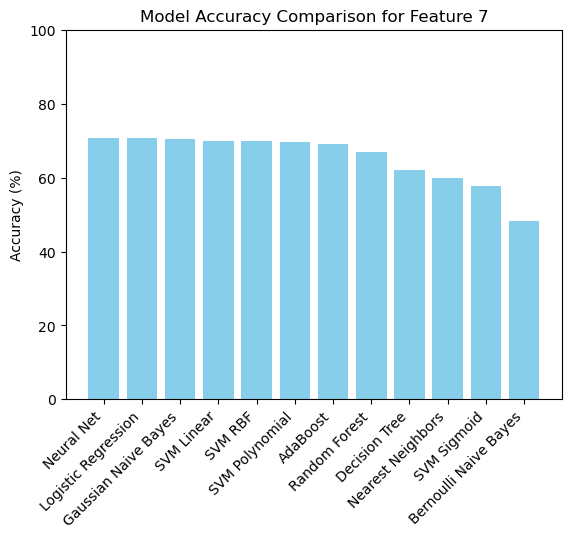

In [75]:
results = [
    ('Nearest Neighbors', 59.83),
    ('Decision Tree', 62.17),
    ('Random Forest', 66.83),
    ('Neural Net', 70.67),
    ('AdaBoost', 69.00),
    ('SVM Linear', 70.00),
    ('SVM RBF', 70.00),
    ('SVM Sigmoid', 57.67),
    ('SVM Polynomial', 69.67),
    ('Gaussian Naive Bayes', 70.50),
    ('Bernoulli Naive Bayes', 48.33),
    ('Logistic Regression', 70.67)
]

# Sorting the results by accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Splitting the sorted results into names and accuracy scores
model_names, accuracies = zip(*sorted_results)

# Plotting
fig, ax = plt.subplots()
ax.bar(model_names, accuracies, color='skyblue')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison for Feature 7')
plt.xticks(rotation=45, ha="right") 
plt.ylim(0, 100) 
plt.show()

### Plot 21 - Confusion Matrix for Neural Net  - Best Model with Feature 7

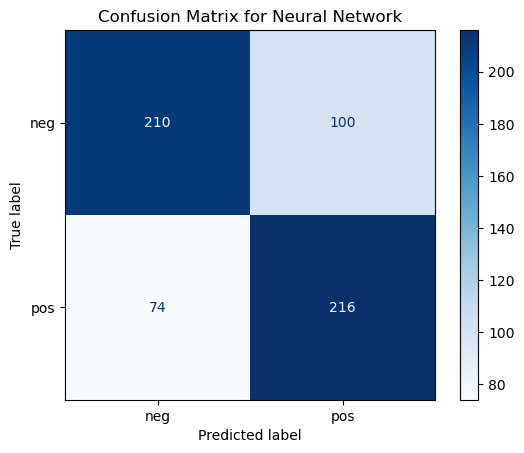

In [76]:
mlp = MLPClassifier(alpha=1, max_iter=400)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=mlp.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Neural Network')
plt.show()

## Feature 8 - TF-IDF Vectors

In [77]:
# Importing again the dataframe without tokenization
df = pd.read_csv('https://raw.githubusercontent.com/AlessandroSciorilli/nltk_movie_reviews/main/movie_reviews.csv')

We use **TfidVestorizer** to simplify the TF-IDF Extraction

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
# Initializing the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  

# Fitting and transforming the processed text to a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Converting the TF-IDF matrix to a DataFrame
features_set8 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Adding the sentiment column from the original DataFrame
features_set8['sentiment'] = df['sentiment']

In [80]:
# Separating features and labels
X_headers = [col for col in features_set8.columns if col != 'sentiment']
X = features_set8[X_headers].values 
y = features_set8['sentiment'].values

#Splitting the data into training and test in the ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Evaluating each model
results = []
for name, model in model_list:
    model.fit(X_train, y_train)  # Training each model
    predictions = model.predict(X_test)  # Testing on the testing dataset
    
    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions, average='binary', pos_label='pos') * 100
    recall = recall_score(y_test, predictions, average='binary', pos_label='pos') * 100
    f1 = f1_score(y_test, predictions, average='binary', pos_label='pos') * 100
    
    results.append((name, accuracy, precision, recall, f1))
    print(f"{name}: Accuracy = {accuracy:.2f}%, Precision = {precision:.2f}%, Recall = {recall:.2f}%, F1 Score = {f1:.2f}%")

Nearest Neighbors: Accuracy = 66.33%, Precision = 67.32%, Recall = 58.97%, F1 Score = 62.87%
Decision Tree: Accuracy = 65.17%, Precision = 60.15%, Recall = 82.76%, F1 Score = 69.67%
Random Forest: Accuracy = 56.00%, Precision = 53.96%, Recall = 61.03%, F1 Score = 57.28%
Neural Net: Accuracy = 85.17%, Precision = 84.54%, Recall = 84.83%, F1 Score = 84.68%
AdaBoost: Accuracy = 75.00%, Precision = 71.08%, Recall = 81.38%, F1 Score = 75.88%
SVM Linear: Accuracy = 85.33%, Precision = 83.44%, Recall = 86.90%, F1 Score = 85.14%
SVM RBF: Accuracy = 85.00%, Precision = 83.56%, Recall = 85.86%, F1 Score = 84.69%
SVM Sigmoid: Accuracy = 83.50%, Precision = 80.91%, Recall = 86.21%, F1 Score = 83.47%
SVM Polynomial: Accuracy = 85.67%, Precision = 85.17%, Recall = 85.17%, F1 Score = 85.17%
Gaussian Naive Bayes: Accuracy = 75.50%, Precision = 77.61%, Recall = 69.31%, F1 Score = 73.22%
Bernoulli Naive Bayes: Accuracy = 82.17%, Precision = 83.52%, Recall = 78.62%, F1 Score = 80.99%
Logistic Regression:

### Plot 22 - Model Accuracy Comparison for Feature 8

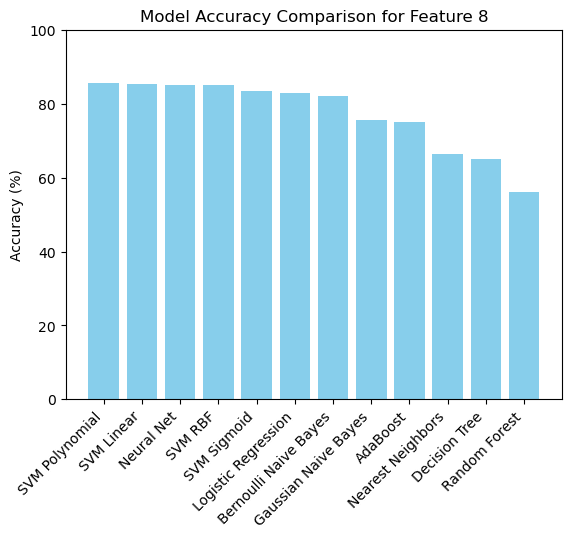

In [81]:
results = [
    ('Nearest Neighbors', 66.33),
    ('Decision Tree', 65.17),
    ('Random Forest', 56.00),
    ('Neural Net', 85.17),
    ('AdaBoost', 75.00),
    ('SVM Linear', 85.33),
    ('SVM RBF', 85.00),
    ('SVM Sigmoid', 83.50),
    ('SVM Polynomial', 85.67),
    ('Gaussian Naive Bayes', 75.50),
    ('Bernoulli Naive Bayes', 82.17),
    ('Logistic Regression', 82.83)
]

# Sort the results by accuracy in descending order
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Split the sorted results into names and accuracy scores
model_names, accuracies = zip(*sorted_results)

# Plotting
fig, ax = plt.subplots()
ax.bar(model_names, accuracies, color='skyblue')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison for Feature 8')
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100) 
plt.show()

### Plot 22 - Confusion Matrix for SVM Polynomial - Best Model with Feature 8

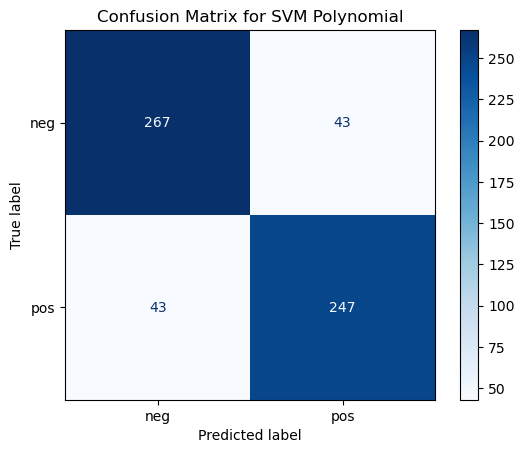

In [82]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
predictions = svm_poly.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=svm_poly.classes_)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_poly.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Polynomial')
plt.show()

<div style="background-color: lightgreen; padding: 10px; font-weight: bold; font-size: 25px">
Conclusion
</div>

### Plot 23 - Table of Model Accuracy Across Features

In [83]:
final_df = pd.DataFrame({
    'Model': [
        'Nearest Neighbors (KNN)', 'Decision Tree', 'Random Forest',
        'Neural Network', 'AdaBoost',
        'SVM Linear', 'SVM RBF', 'SVM Sigmoid', 'SVM Polynomial',
        'Gaussian Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression'
    ],
    'Feature 1': [54.83, 64.00, 56.00, 81.67, 76.00, 80.67, 81.83, 73.50, 73.00, 74.50, 82.50, 81.83],
    'Feature 2': [56.83, 53.67, 55.33, 73.33, 61.50, 69.17, 74.83, 76.33, 59.83, 70.00, 76.17, 76.00],
    'Feature 3': [55.67, 48.83, 48.50, 61.17, 54.17, 60.67,	61.17, 62.33, 47.67, 64.33, 64.83, 61.33],
    'Feature 4': [60.00, 48.67, 50.50, 73.67, 58.33, 67.00,	67.17, 69.50, 67.83, 76.17, 74.50, 74.17],
    'Feature 5': [91.67, 98.67, 62.67, 99.83, 99.50, 99.83,	99.83, 99.83, 89.33, 100.00, 100.00, 99.83],
    'Feature 6': [58.00, 62.00, 63.83, 61.33, 62.00, 61.50,	63.00, 57.67, 62.83, 61.00, 50.67, 61.67],
    'Feature 7': [59.83, 62.17, 66.83, 70.67, 69.00, 70.00, 70.00, 57.67, 69.67, 70.50, 48.33, 70.67],
    'Feature 8': [66.33, 65.17, 56.00, 85.17, 75.00, 85.33,	85.00, 83.50, 85.67, 75.50, 82.17, 82.83]
})

def highlight_max(data, color):
    attr = f'background-color: {color};'
    if data.ndim == 1:  # Series from apply
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # DataFrame from style.apply
        overall_max = data.select_dtypes(include=[float, int]).to_numpy().max()
        is_max = data == overall_max
        return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)

# Applying the style
styled_table = final_df.style.apply(highlight_max, subset=pd.IndexSlice[:, 'Feature 1':'Feature 8'], color='yellow')\
                       .apply(highlight_max, color='red', axis=None)\
                       .set_caption('Model Accuracy Across Features')\
                       .format("{:.2f}", subset=pd.IndexSlice[:, 'Feature 1':'Feature 8'])\
                       .hide_index()

styled_table


C:\Users\aless\AppData\Local\Temp\ipykernel_31992\2516854718.py:33: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()


Model,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8
Nearest Neighbors (KNN),54.83,56.83,55.67,60.00,91.67,58.00,59.83,66.33
Decision Tree,64.00,53.67,48.83,48.67,98.67,62.00,62.17,65.17
Random Forest,56.00,55.33,48.50,50.50,62.67,63.83,66.83,56.00
Neural Network,81.67,73.33,61.17,73.67,99.83,61.33,70.67,85.17
AdaBoost,76.00,61.50,54.17,58.33,99.50,62.00,69.00,75.00
SVM Linear,80.67,69.17,60.67,67.00,99.83,61.50,70.00,85.33
SVM RBF,81.83,74.83,61.17,67.17,99.83,63.00,70.00,85.00
SVM Sigmoid,73.50,76.33,62.33,69.50,99.83,57.67,57.67,83.50
SVM Polynomial,73.00,59.83,47.67,67.83,89.33,62.83,69.67,85.67
Gaussian Naive Bayes,74.50,70.00,64.33,76.17,100.00,61.00,70.50,75.50


### Plot 24 - Bar Chart of Best Model for Accuracy  Across Features

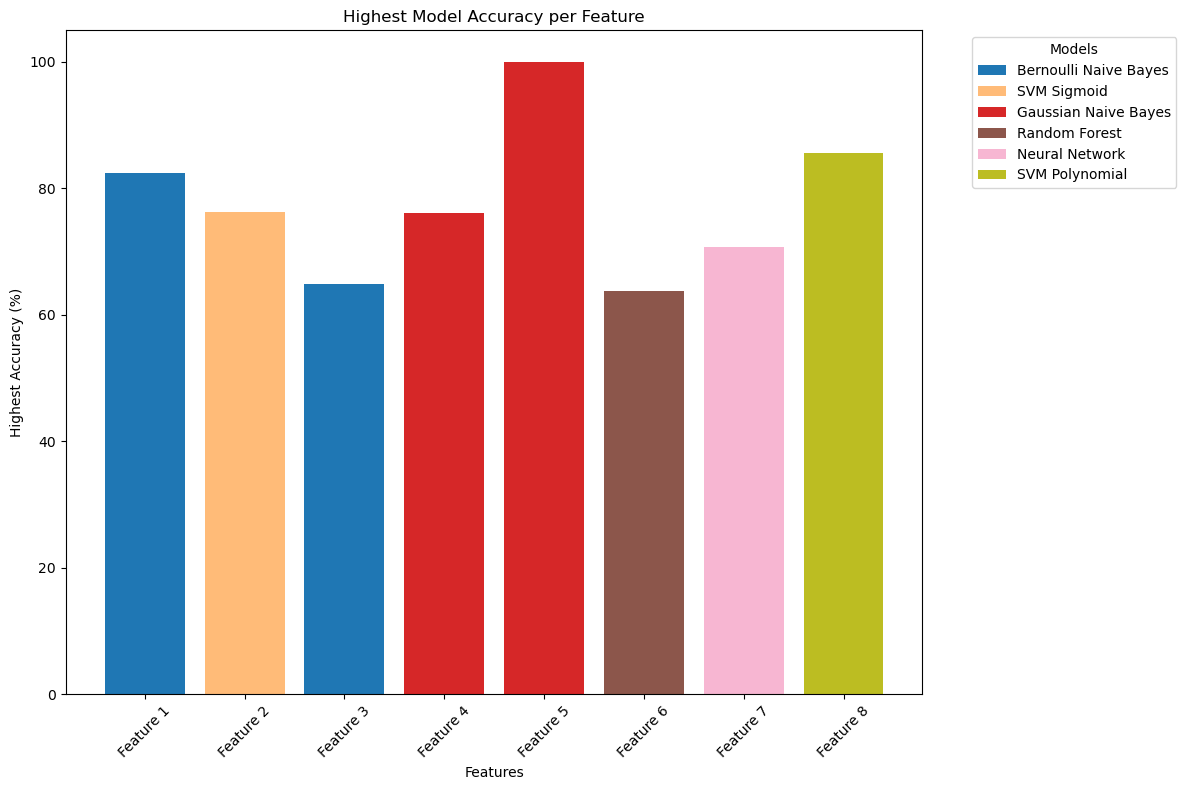

In [84]:
# Determining the max value and corresponding model for each feature
max_indices = final_df.loc[:, 'Feature 1':].idxmax()
max_models = final_df.loc[max_indices, 'Model'].values
unique_models = pd.unique(max_models)

# Creating a mapping of models to colors
color_map = {model: plt.cm.tab20(i / len(unique_models)) for i, model in enumerate(unique_models)}
colors = [color_map[model] for model in max_models]

# Plotting
plt.figure(figsize=(12, 8))
for feature, color, model in zip(final_df.columns[1:], colors, max_models):
    plt.bar(feature, final_df[feature][max_indices[feature]], color=color, label=model)

# Creating a legend by filtering duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # filter duplicates
plt.legend(by_label.values(), by_label.keys(), title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Features')
plt.ylabel('Highest Accuracy (%)')
plt.title('Highest Model Accuracy per Feature')
plt.xticks(rotation=45)
plt.tight_layout()

# Showing the plot
plt.show()